In [41]:
from scipy.integrate import quad
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# constant
a_0 = 7e8 #cm
v_0 = 1.3e9 #cm/s
D = 3.086e22 #cm
M_solar = 1.989e33 #g
M_ej = 1.4 * M_solar #g
M_p = 1.67e-24 #g
M_e = 9.11e-28 #g
M_Co = 56 * M_p #g
M_Ni = 58 * M_p #g
e = 1e-9 #calibration
M_56_Ni_core = 0.5 * M_solar #g

In [42]:
# calculation of Flux-Cobalt in diffterent time: (input unit: days)
def F_Co(t):
    a = a_0 + v_0*t*86400 #cm
    # R_0 = (0.9 * M_56_Ni_core/M_ej)**(1/3) * a #cm
    # h = a - (0.1 * M_56_Ni_core * 21 / np.pi)**(1/3) #cm
    S_E = 0.68 / 56 * (np.exp(-t/111.3) - np.exp(-t/8.8)) / ((111.3 - 8.8)*86400) / (0.06604 * M_Co) * 2

    # integration for Flux
    def I_E(x):
        tai_a = M_ej / M_p / (4/3 * np.pi * (a)** 3) * 0.06604 * M_Co * a
        l2 = 2 * np.sqrt((a)**2 - (D * x)**2)

        f2 = (1 - np.exp(- tai_a * l2 / a)) * x
        return f2
    
    res2, err = quad(I_E, 0, a/D)
    
    return S_E * res2

In [43]:
# calculation of Flux-Nickel in diffterent time: (input unit: days)
def F_Ni(t):
    a = a_0 + v_0*t*86400 #cm
    # R_0 = (0.9 * M_56_Ni_core/M_ej)**(1/3) * a #cm
    # h = a - (0.1 * M_56_Ni_core * 21 / np.pi)**(1/3) #cm
    S_E = 1.55 / 56 * (np.exp(-t/8.8)) / ((8.8)*86400) / (0.06891 * M_Ni) * 2

    # integration for Flux
    def I_E(x):
        tai_a = M_ej / M_p / (4/3 * np.pi * (a)** 3) * 0.06891 * M_Ni * a
        l2 = 2 * np.sqrt((a)**2 - (D * x)**2)

        f2 = (1 - np.exp(- tai_a * l2 / a)) * x
        return f2
    
    res2, err = quad(I_E, 0, a/D)
    
    return S_E * res2

In [44]:
# data
t = []
for i in range(1, 2501):
    t.append(i)

flux_Co = []
flux_Ni = []
for i in t:
    flux_Co.append(F_Co(i))
    flux_Ni.append(F_Ni(i))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


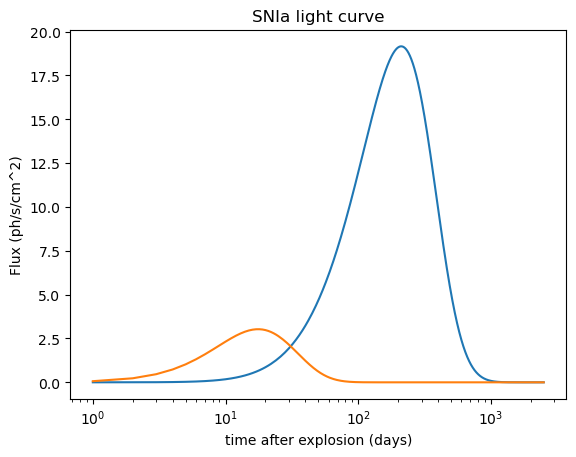

In [45]:
# graphing with matplotlib
plt.plot(t, flux_Co)
plt.plot(t, flux_Ni)
plt.xlabel('time after explosion (days)')
plt.ylabel('Flux (ph/s/cm^2)')
plt.title('SNIa light curve')

plt.xscale('log')

mpl.rcParams['legend.frameon'] = False
plt.legend(loc=0)

plt.show()